Iteration 100/1000 | Cost: 0.2543
Iteration 200/1000 | Cost: 0.1917
Iteration 300/1000 | Cost: 0.1633
Iteration 400/1000 | Cost: 0.1465
Iteration 500/1000 | Cost: 0.1350
Iteration 600/1000 | Cost: 0.1266
Iteration 700/1000 | Cost: 0.1202
Iteration 800/1000 | Cost: 0.1150
Iteration 900/1000 | Cost: 0.1107
Iteration 1000/1000 | Cost: 0.1071


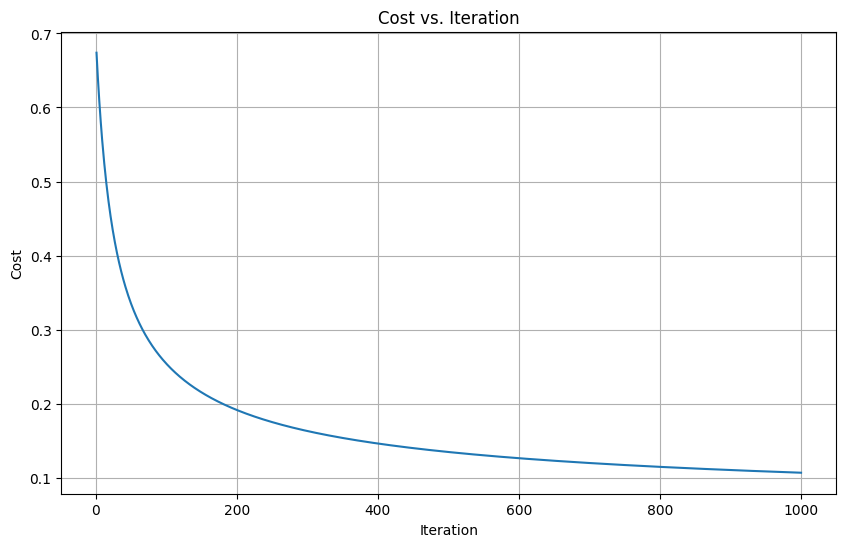


Training Accuracy: 0.9824
Test Accuracy: 0.9825

Top 10 Most Important Features:
                 Feature  Coefficient
21          worst radius    -0.443309
22         worst texture    -0.433364
23       worst perimeter    -0.423321
24            worst area    -0.418177
28  worst concave points    -0.397392
8    mean concave points    -0.396643
1            mean radius    -0.374827
3         mean perimeter    -0.371218
4              mean area    -0.371052
0                   Bias     0.354661


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def sigmoid(z):
    """
    Compute the sigmoid function.
    """
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    """
    Compute the cost function for logistic regression.
    """
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # Small constant to prevent log(0)
    cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1-y) * np.log(1-h + epsilon))
    return cost

def gradient_descent(X, y, theta, alpha, num_iterations):
    """
    Perform gradient descent to optimize theta parameters.

    Parameters:
    X: Feature matrix
    y: Target vector
    theta: Initial parameters
    alpha: Learning rate
    num_iterations: Number of iterations

    Returns:
    theta: Optimized parameters
    cost_history: List of costs at each iteration
    """
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Compute hypothesis
        h = sigmoid(np.dot(X, theta))

        # Update theta
        gradient = np.dot(X.T, (h - y)) / m
        theta = theta - alpha * gradient

        # Store cost
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Print progress every 100 iterations
        if (i + 1) % 100 == 0:
            print(f'Iteration {i+1}/{num_iterations} | Cost: {cost:.4f}')

    return theta, cost_history

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term
X_train_scaled = np.column_stack([np.ones(X_train_scaled.shape[0]), X_train_scaled])
X_test_scaled = np.column_stack([np.ones(X_test_scaled.shape[0]), X_test_scaled])

# Initialize parameters
theta = np.zeros(X_train_scaled.shape[1])

# Set hyperparameters
alpha = 0.01
num_iterations = 1000

# Train the model
theta_optimal, cost_history = gradient_descent(X_train_scaled, y_train, theta, alpha, num_iterations)

# Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.grid(True)
plt.show()

# Make predictions
def predict(X, theta, threshold=0.5):
    """
    Make predictions using the trained model.
    """
    probabilities = sigmoid(np.dot(X, theta))
    return (probabilities >= threshold).astype(int)

# Calculate accuracy
y_pred_train = predict(X_train_scaled, theta_optimal)
y_pred_test = predict(X_test_scaled, theta_optimal)

train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)

print(f'\nTraining Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Print feature importance
feature_names = ['Bias'] + list(data.feature_names)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': theta_optimal
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
print('\nTop 10 Most Important Features:')
print(feature_importance.head(10))